In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, t0, y0, h, n_steps):
    """Implementación clásica del método RK4."""
    t_vals = np.zeros(n_steps + 1)
    y_vals = np.zeros((n_steps + 1, len(np.atleast_1d(y0))))

    t_vals[0] = t0
    y_vals[0] = np.atleast_1d(y0)

    for i in range(n_steps):
        t = t_vals[i]
        y = y_vals[i]

        k1 = h * f(t, y)
        k2 = h * f(t + 0.5*h, y + 0.5*k1)
        k3 = h * f(t + 0.5*h, y + 0.5*k2)
        k4 = h * f(t + h, y + k3)

        y_vals[i+1] = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t_vals[i+1] = t + h

    return t_vals, y_vals


In [2]:
def ejemplo_logistico():
    r = 1
    K = 10

    def f(t, y):
        return r * y * (1 - y/K)

    def y_exact(t):
        return K / (1 + (K/y0 - 1)*np.exp(-r*t))

    return f, y_exact, "Ecuación logística"


In [3]:
def ejemplo_exponencial():
    a = 3

    def f(t, y):
        return a * y

    def y_exact(t):
        return y0 * np.exp(a*t)

    return f, y_exact, "Crecimiento exponencial"


In [ ]:
def ejemplo_decaimiento():
    λ = 0.5
    p = 2

    def f(t, y):
        return -λ * y**p

    def y_exact(t):
        return 1 / (1 + λ*t)  # caso p=2

    return f, y_exact, "Decaimiento radiactivo no lineal"


In [ ]:
def ejemplo_sin_exacta():
    def f(t, y):
        return np.sin(t) - y**2

    return f, None, "EDO: sin(t) – y²"


In [4]:
# Ejecutador
f, y_exact, desc = ejemplo_exponencial()


In [5]:
#Parám3etros
t0 = 0
y0 = 1
h = 0.1
n_steps = 100

t, y = rk4(f, t0, y0, h, n_steps)
y = y.squeeze()



================= TABLA COMPARATIVA =================

|    t    |      RK4         |      Exacta      |   Error abs     |
|---------|------------------|------------------|------------------|
|  0.0000 |     1.0000000000 |     1.0000000000 |   0.00000000e+00 |
|  0.1000 |     1.3498375000 |     1.3498588076 |   2.13075760e-05 |
|  0.2000 |     1.8220612764 |     1.8221188004 |   5.75239843e-05 |
|  0.3000 |     2.4594866382 |     2.4596031112 |   1.16472966e-04 |
|  0.4000 |     3.3199072950 |     3.3201169227 |   2.09627757e-04 |
|  0.5000 |     4.4813353633 |     4.4816890703 |   3.53707052e-04 |
|  0.6000 |     6.0490745234 |     6.0496474644 |   5.72940973e-04 |
|  0.7000 |     8.1652676320 |     8.1661699126 |   9.02280533e-04 |
|  0.8000 |    11.0217844473 |    11.0231763806 |   1.39193339e-03 |
|  0.9000 |    14.8776179638 |    14.8797317249 |   2.11376105e-03 |
|  1.0000 |    20.0823666382 |    20.0855369232 |   3.17028495e-03 |
|  1.1000 |    27.1079315770 |    27.1126389207 

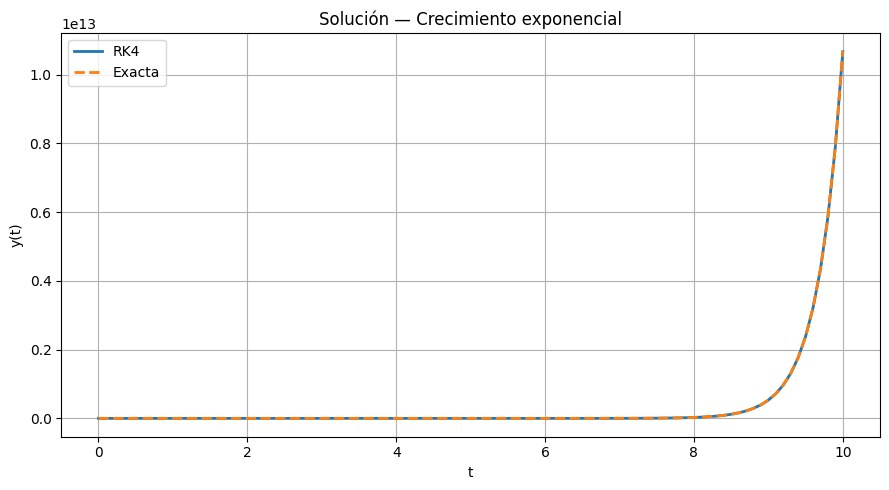

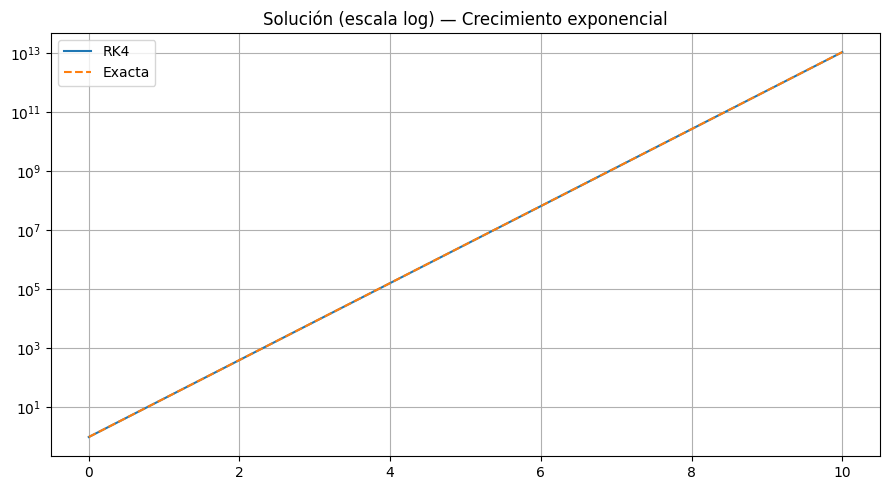

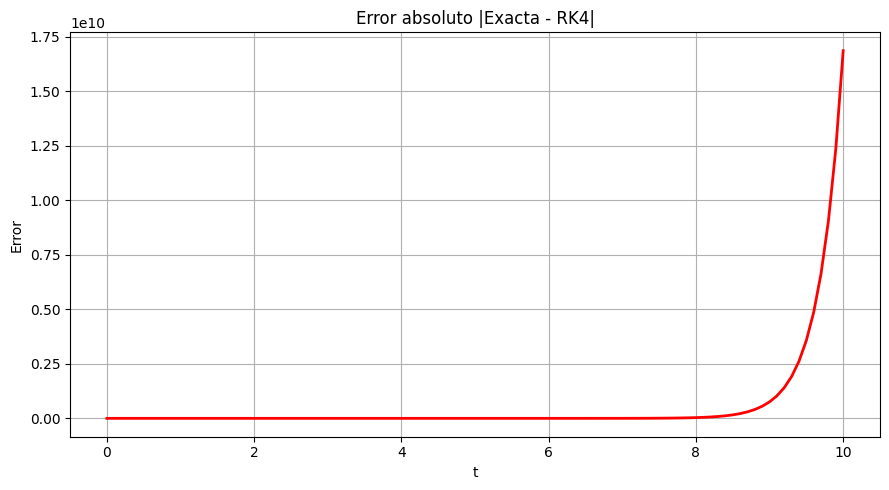

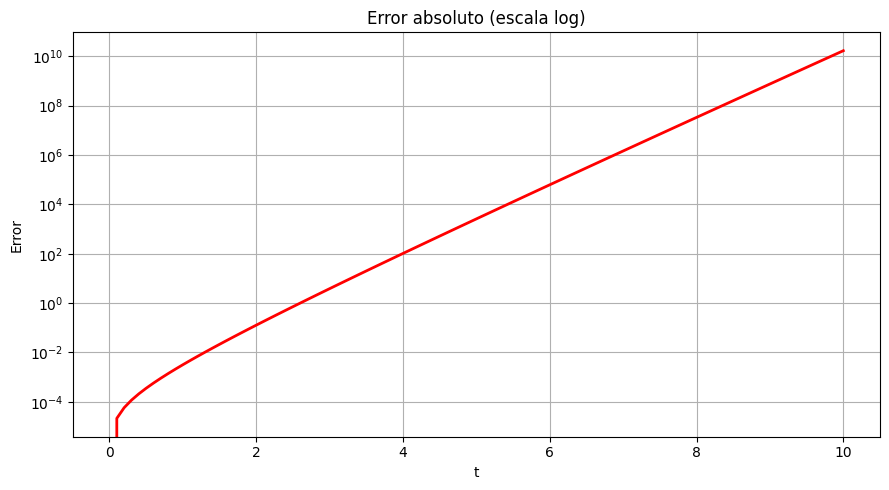

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# ============================================================
#     IMPRESIÓN DE RESULTADOS
# ============================================================

print("\n================= TABLA COMPARATIVA =================\n")

if y_exact is None:
    print("No existe solución exacta para este ejemplo.\n")
    print("|    t    |     RK4          |")
    print("|---------|------------------|")
    for i in range(len(t)):
        print(f"| {t[i]:7.4f} | {y[i]:16.10f} |")

else:
    y_ex = y_exact(t)
    print("|    t    |      RK4         |      Exacta      |   Error abs     |")
    print("|---------|------------------|------------------|------------------|")

    for i in range(len(t)):
        err = abs(y_ex[i] - y[i])
        print(f"| {t[i]:7.4f} | {y[i]:16.10f} | {y_ex[i]:16.10f} | {err:16.8e} |")


# ============================================================
#     GRÁFICAS
# ============================================================

# --- 1. SOLUCIÓN RK4 vs EXACTA ---
plt.figure(figsize=(9,5))
plt.plot(t, y, label="RK4", linewidth=2)
if y_exact is not None:
    plt.plot(t, y_ex, "--", label="Exacta", linewidth=2)

plt.title(f"Solución — {desc}")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# --- 2. Escala log ---
if np.all(y > 0):
    plt.figure(figsize=(9,5))
    plt.semilogy(t, y, label="RK4")
    if y_exact is not None:
        plt.semilogy(t, y_ex, "--", label="Exacta")
    plt.title(f"Solución (escala log) — {desc}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# --- 3. Error absoluto ---
if y_exact is not None:
    error = np.abs(y_ex - y)
    plt.figure(figsize=(9,5))
    plt.plot(t, error, color="red", linewidth=2)
    plt.title("Error absoluto |Exacta - RK4|")
    plt.xlabel("t")
    plt.ylabel("Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- 4. Error log ---
    plt.figure(figsize=(9,5))
    plt.semilogy(t, error, color="red", linewidth=2)
    plt.title("Error absoluto (escala log)")
    plt.xlabel("t")
    plt.ylabel("Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ============================================================
#   GRÁFICA INTERACTIVA
# ============================================================

fig = make_subplots(rows=1, cols=1, subplot_titles=["Solución RK4 vs Exacta (Interactiva)"])

# Curva RK4
fig.add_trace(go.Scatter(x=t, y=y, mode='lines', name='RK4'))

# Curva exacta
if y_exact is not None:
    fig.add_trace(go.Scatter(x=t, y=y_ex, mode='lines', name='Exacta'))

fig.update_layout(
    width=900,
    height=500,
    title="Gráfica interactiva — Zoom y desplazamiento",
    xaxis_title="t",
    yaxis_title="y(t)",
)

fig.show()
